In [317]:
import numpy as np
import pandas as pd
import Auxillary_Functions as af
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yaml
import math
import warnings

environment_path = 'environment.yml'
af.read_data(environment_path)

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

from sklearn import preprocessing
from sklearn import datasets, linear_model

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit, \
        validation_curve, cross_validate, train_test_split, KFold, cross_val_predict
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelBinarizer, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

# Load csvs from path and provide summary statistics
file_path_1 = 'Bike-Sharing-Dataset/day.csv'
file_path_2 = 'Bike-Sharing-Dataset/hour.csv'

raw_day_df = af.read_data(file_path_1)
raw_hour_df = af.read_data(file_path_2)
    

warnings.simplefilter(action='ignore')    

In [3]:
raw_day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [4]:
raw_hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


# Exploratory Data Analysis

In [10]:
raw_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [108]:
raw_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
raw_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
raw_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
raw_day_df.isnull().values.any()

False

In [6]:
raw_hour_df.isnull().values.any()

False

# Data Cleaning and Preparation

## Checking for correctness in dates

In [73]:
raw_hour_df['dteday'] = pd.to_datetime(raw_hour_df.dteday)

First check if column 'mnth' corresponds to the month value from 'dteday' column

In [56]:
all(raw_hour_df['dteday'].dt.month == raw_hour_df['mnth'])

True

Then check if column 'yr' corresponds to the year values from 'dteday' column represented as binary

In [64]:
binary_year = pd.Series(raw_hour_df['dteday'].dt.year == 2012)
all(binary_year == raw_hour_df['yr'].astype('bool'))

True

Finally, create a 'day' column that represents the day of the month

In [129]:
raw_hour_df[(raw_hour_df.season == 4) & (raw_hour_df.mnth == 12)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7904,7905,2011-12-01,4,0,12,0,0,4,1,1,0.28,0.2576,0.52,0.3284,1,19,20
7905,7906,2011-12-01,4,0,12,1,0,4,1,1,0.26,0.2424,0.60,0.2836,1,9,10
7906,7907,2011-12-01,4,0,12,2,0,4,1,1,0.26,0.2273,0.56,0.2985,1,8,9
7907,7908,2011-12-01,4,0,12,3,0,4,1,1,0.26,0.2424,0.56,0.2537,1,6,7
7908,7909,2011-12-01,4,0,12,4,0,4,1,1,0.26,0.2424,0.56,0.2836,0,1,1
7909,7910,2011-12-01,4,0,12,5,0,4,1,1,0.26,0.2424,0.56,0.2537,1,23,24
7910,7911,2011-12-01,4,0,12,6,0,4,1,1,0.24,0.2121,0.65,0.2836,5,92,97
7911,7912,2011-12-01,4,0,12,7,0,4,1,1,0.24,0.2121,0.65,0.3582,11,265,276
7912,7913,2011-12-01,4,0,12,8,0,4,1,1,0.26,0.2273,0.60,0.3284,15,462,477
7913,7914,2011-12-01,4,0,12,9,0,4,1,1,0.30,0.2727,0.52,0.3284,9,215,224


Defining previous steps as function to later use in data preparation pipeline:

In [388]:
def drop_columns(df):
    df = df.drop(['instant','temp'], axis = 1)
    return df

## Data preparation 

### Data preparation functions

In [386]:
def fix_types(df):
    df[['season','weathersit', 'mnth', 'weekday']] = df[['season','weathersit', 'mnth', 'weekday']].astype('category')
    df[['yr', 'holiday', 'workingday']] = df[['yr', 'holiday', 'workingday']].astype('uint8')
    df['dteday'] = pd.to_datetime(df.dteday)
    return df

In [9]:
def feature_skewness(df):
    numeric_dtypes = ['float64'] ## limiting to explanatory variables
    numeric_features = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes: 
            numeric_features.append(i)

    feature_skew = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':feature_skew})
    return feature_skew, numeric_features

def fix_skewness(df):
    feature_skew, numeric_features = feature_skewness(df)
    high_skew = feature_skew[abs(feature_skew) > 0.5]
    skew_index = high_skew.index
    
    new_df = df.copy()
    
    for i in skew_index:
        new_df[i] = boxcox1p(new_df[i], boxcox_normmax(new_df[i]+1))

    skew_features = new_df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':skew_features})
    return new_df

In [10]:
def numerical_features(df):
    columns = df.columns
    return df._get_numeric_data().columns

def categorical_features(df):
    numerical_columns = numerical_features(df)
    return(list(set(df.columns) - set(numerical_columns)))

def onehot_encode(df):
    numericals = df.get(numerical_features(df))
    new_df = numericals.copy()
    for categorical_column in categorical_features(df):
        new_df = pd.concat([new_df, 
                            pd.get_dummies(df[categorical_column], 
                                           prefix=categorical_column)], 
                           axis=1)
    return new_df

In [5]:
def standardize_data(df):
    std_scale = preprocessing.MinMaxScaler().fit(df[['atemp', 'hum', 'windspeed']])
    df[['atemp', 'hum', 'windspeed']] = std_scale.transform(df[['atemp', 'hum', 'windspeed']])
    
    return df

In [395]:
def standardize_hour(df):
    df[['hr']] = df[['hr']].astype('category')
    df = onehot_encode(df)
    
    return df

### Data Preparation Pipeline

In [389]:
raw_hour_df = af.read_data(file_path_2)
dataset = (fix_types(fix_skewness(standardize_data(drop_columns(raw_hour_df)))))

In [323]:
dataset.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.2879,0.75,0.0,0,1,1


In [357]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 61 columns):
yr              17379 non-null uint8
holiday         17379 non-null uint8
workingday      17379 non-null uint8
temp            17379 non-null float64
atemp           17379 non-null float64
hum             17379 non-null float64
windspeed       17379 non-null float64
casual          17379 non-null int64
registered      17379 non-null int64
cnt             17379 non-null int64
season_1        17379 non-null uint8
season_2        17379 non-null uint8
season_3        17379 non-null uint8
season_4        17379 non-null uint8
weathersit_1    17379 non-null uint8
weathersit_2    17379 non-null uint8
weathersit_3    17379 non-null uint8
weathersit_4    17379 non-null uint8
hr_0            17379 non-null uint8
hr_1            17379 non-null uint8
hr_2            17379 non-null uint8
hr_3            17379 non-null uint8
hr_4            17379 non-null uint8
hr_5            17379 non-null u

In [13]:
feature_skewness(raw_hour_df)

(windspeed    0.574856
 temp        -0.006020
 atemp       -0.090421
 hum         -0.111278
 dtype: float64, ['temp', 'atemp', 'hum', 'windspeed'])

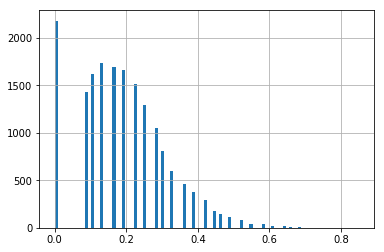

In [14]:
raw_hour_df.windspeed.hist(bins = 100)

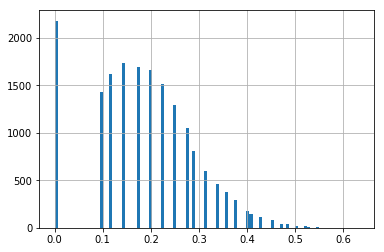

In [15]:
dataset.windspeed.hist(bins = 100)

# Baseline model

Split in test and train set

In [415]:
test = dataset[(dataset.yr == 1) & ((dataset.dteday.dt.month == 10)|(dataset.dteday.dt.month == 11)|(dataset.dteday.dt.month == 12))]
train = dataset[:(len(dataset)-len(test))]

test = onehot_encode(test.drop(['dteday'], axis = 1))
train = onehot_encode(train.drop(['dteday'], axis = 1))

In [417]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15211 entries, 0 to 15210
Data columns (total 37 columns):
yr              15211 non-null uint8
hr              15211 non-null int64
holiday         15211 non-null uint8
workingday      15211 non-null uint8
atemp           15211 non-null float64
hum             15211 non-null float64
windspeed       15211 non-null float64
casual          15211 non-null int64
registered      15211 non-null int64
cnt             15211 non-null int64
mnth_1          15211 non-null uint8
mnth_2          15211 non-null uint8
mnth_3          15211 non-null uint8
mnth_4          15211 non-null uint8
mnth_5          15211 non-null uint8
mnth_6          15211 non-null uint8
mnth_7          15211 non-null uint8
mnth_8          15211 non-null uint8
mnth_9          15211 non-null uint8
mnth_10         15211 non-null uint8
mnth_11         15211 non-null uint8
mnth_12         15211 non-null uint8
season_1        15211 non-null uint8
season_2        15211 non-null uin

Defining the linear regression model for the baseline score

In [413]:
def score_model(train, test):
    X_train = train.loc[:, (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ]
    y_train = train.loc[:, 'cnt']
    
    X_test = test.loc[:, (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ]
    y_test = test.loc[:, 'cnt']        
                        
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = pd.Series([1 if i < 0 else math.ceil(i) for i in regr.predict(X_test)], index = X_test.index.values)
    
    return r2_score(y_test, y_pred)
   

In [416]:
score_model(train, test)

0.3230057224518983

In [168]:
def score_model2(train, test, seed = 123):
    X_train = train.loc[:, (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ]
    y_train = train.loc[:, 'registered']
    
    X_test = test.loc[:, (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ]
    y_test = test.loc[:, 'registered']             
                        
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=seed)

    pipeline = Pipeline([
        #('polynomials', PolynomialFeatures(degree=3, include_bias=False)), 
        ('linear_regression', LinearRegression(n_jobs=-1))])
    pipeline.fit(X_train, y_train)
    training_score = pipeline.score(X_test, y_test)
    print('R2 from entire-dataset estimator: {:.2f}'.format(training_score))

    # Obtain scores and estimators from different splits and use the best one.
    scores = cross_validate(pipeline, 
                            X_train, y_train,
                            scoring=['r2'], 
                            cv=cv,
                            return_estimator=True)
    split_scores = [scores['estimator'][i].score(X_test, y_test) 
                    for i in range(len(scores))]
    index_best = split_scores.index(max(split_scores))
    print('Best estimator R2 score: {:.2f}'.format(split_scores[index_best]))

In [418]:
score_model2(train, test)

R2 from entire-dataset estimator: 0.27
Best estimator R2 score: 0.27


# Multiple models

In [419]:
def score_multiple(train, test):
    
    X005_train = standardize_hour(train.loc[(train.workingday == 0) & (train.hr < 6), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y005_train = train.loc[(train.workingday == 0) & (train.hr < 6), 'cnt']
    X005_test = standardize_hour(test.loc[(test.workingday == 0) & (test.hr < 6), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    X0512_train = standardize_hour(train.loc[(train.workingday == 0) & (train.hr > 5) & (train.hr < 13), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y0512_train = train.loc[(train.workingday == 0) & (train.hr > 5) & (train.hr < 13), 'cnt']
    X0512_test = standardize_hour(test.loc[(test.workingday == 0) & (test.hr > 5) & (test.hr < 13), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    X01216_train = standardize_hour(train.loc[(train.workingday == 0) & (train.hr > 12) & (train.hr < 17), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y01216_train = train.loc[(train.workingday == 0) & (train.hr > 12) & (train.hr < 17), 'cnt']
    X01216_test = standardize_hour(test.loc[(test.workingday == 0) & (test.hr > 12) & (test.hr < 17), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    X01623_train = standardize_hour(train.loc[(train.workingday == 0) & (train.hr > 16), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y01623_train = train.loc[(train.workingday == 0) & (train.hr > 16), 'cnt']
    X01623_test = standardize_hour(test.loc[(test.workingday == 0) & (test.hr > 16), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    X104_train = standardize_hour(train.loc[(train.workingday == 1) & (train.hr < 5), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y104_train = train.loc[(train.workingday == 1) & (train.hr < 5), 'cnt']
    X104_test = standardize_hour(test.loc[(test.workingday == 1) & (test.hr < 5), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    X148_train = standardize_hour(train.loc[(train.workingday == 1) & (train.hr > 4) & (train.hr < 9), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y148_train = train.loc[(train.workingday == 1) & (train.hr > 4) & (train.hr < 9), 'cnt']
    X148_test = standardize_hour(test.loc[(test.workingday == 1) & (test.hr > 4) & (test.hr < 9), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    X1810_train = standardize_hour(train.loc[(train.workingday == 1) & (train.hr > 8) & (train.hr < 11), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y1810_train = train.loc[(train.workingday == 1) & (train.hr > 8) & (train.hr < 11), 'cnt']
    X1810_test = standardize_hour(test.loc[(test.workingday == 1) & (test.hr > 8) & (test.hr < 11), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    X11015_train = standardize_hour(train.loc[(train.workingday == 1) & (train.hr > 10) & (train.hr < 16), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y11015_train = train.loc[(train.workingday == 1) & (train.hr > 10) & (train.hr < 16), 'cnt']
    X11015_test = standardize_hour(test.loc[(test.workingday == 1) & (test.hr > 10) & (test.hr < 16), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    X11518_train = standardize_hour(train.loc[(train.workingday == 1) & (train.hr > 15) & (train.hr < 19), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y11518_train = train.loc[(train.workingday == 1) & (train.hr > 15) & (train.hr < 19), 'cnt']
    X11518_test = standardize_hour(test.loc[(test.workingday == 1) & (test.hr > 15) & (test.hr < 19), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    X11823_train = standardize_hour(train.loc[(train.workingday == 1) & (train.hr > 18), (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ])
    y11823_train = train.loc[(train.workingday == 1) & (train.hr > 18), 'cnt']
    X11823_test = standardize_hour(test.loc[(test.workingday == 1) & (test.hr > 18), (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ])
    
    y_test = test.loc[:, 'cnt']    
                        
    # Create linear regression objects
    regr005 = linear_model.LinearRegression()
    regr005.fit(X005_train, y005_train)
    y005_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr005.predict(X005_test)], index = X005_test.index.values)

    regr0512 = linear_model.LinearRegression()
    regr0512.fit(X0512_train, y0512_train)
    y0512_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr0512.predict(X0512_test)], index = X0512_test.index.values)

    regr01216 = linear_model.LinearRegression()
    regr01216.fit(X01216_train, y01216_train)
    y01216_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr01216.predict(X01216_test)], index = X01216_test.index.values)

    regr01623 = linear_model.LinearRegression()
    regr01623.fit(X01623_train, y01623_train)
    y01623_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr01623.predict(X01623_test)], index = X01623_test.index.values)

    regr104 = linear_model.LinearRegression()
    regr104.fit(X104_train, y104_train)
    y104_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr104.predict(X104_test)], index = X104_test.index.values)

    regr148 = linear_model.LinearRegression()
    regr148.fit(X148_train, y148_train)
    y148_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr148.predict(X148_test)], index = X148_test.index.values)

    regr1810 = linear_model.LinearRegression()
    regr1810.fit(X1810_train, y1810_train)
    y1810_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr1810.predict(X1810_test)], index = X1810_test.index.values)

    regr11015 = linear_model.LinearRegression()
    regr11015.fit(X11015_train, y11015_train)
    y11015_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr11015.predict(X11015_test)], index = X11015_test.index.values)

    regr11518 = linear_model.LinearRegression()
    regr11518.fit(X11518_train, y11518_train)
    y11518_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr11518.predict(X11518_test)], index = X11518_test.index.values)

    regr11823 = linear_model.LinearRegression()
    regr11823.fit(X11823_train, y11823_train)
    y11823_pred = pd.Series([1 if (i < 0 or i > 1000) else math.ceil(i) for i in regr11823.predict(X11823_test)], index = X11823_test.index.values)
    
    y_pred = pd.DataFrame(columns = list(y005_pred))
    y_pred = pd.concat([y005_pred, y0512_pred, y01216_pred, y01623_pred, y104_pred, y148_pred, y1810_pred, y11015_pred, y11518_pred, y11823_pred]).sort_index()
    
#     for i in y_test.index.values:
#         print((y_test[i], y_pred[i]))
    
    return r2_score(y_test, y_pred)
    

In [420]:
score_multiple(train, test)

0.841872938300696

## Feature Engineering

In [92]:
def feature_engineering_pipeline(raw_data, fe_functions):
    selected_functions = []
    base_score = score_model_reg(raw_data)
    print('Base Score: {:.4f}'.format(base_score))
    engineered_data = raw_data.copy()
    for fe_function in fe_functions:
        processed_data = globals()[fe_function](engineered_data)
        new_score = score_model(processed_data)
        print('- New Score ({}): {:.4f} '.format(fe_function, new_score), 
              end='')
        difference = (new_score-base_score)
        print('[diff: {:.4f}] '.format(difference), end='')
        if difference > -0.01:
            selected_functions.append(fe_function)
            engineered_data = processed_data.copy()
            base_score = new_score
            print('[Accepted]')
        else:
            print('[Rejected]')
    return selected_functions, engineered_data

In [101]:
def score_model_reg(train, seed = 111):
    X = train.loc[:, (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ]
    y = train.loc[:, 'registered']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                        random_state=seed)        
                        
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = [1 if i < 0 else math.ceil(i) for i in regr.predict(X_test)]
    return r2_score(y_test, y_pred)

In [376]:
def remove_outliers(df):
    X = df.drop(['cnt', 'casual', 'registered'], axis=1)
    y = df.cnt.reset_index(drop=True)
    ols = sm.OLS(endog = y, exog = X)
    fit = ols.fit()
    test = fit.outlier_test()['bonf(p)']
    outliers = list(test[test<1e-3].index) 
    df.drop(df.index[outliers])
    return df

In [163]:
fe_functions = [
               ]
funcs, new_dataset = feature_engineering_pipeline(train, fe_functions)



Base Score: 0.7038


In [162]:
score_model_reg(train, test)

ValueError:        yr  holiday  workingday   atemp   hum  windspeed  casual  registered  \
15211   1        0           1  0.4545  0.72   0.114076       6          39   
15212   1        0           1  0.4394  0.77   0.098804       5          13   
15213   1        0           1  0.4545  0.72   0.000000       6           6   
15214   1        0           1  0.4394  0.77   0.000000       1           6   
15215   1        0           1  0.4242  0.82   0.114076       0          10   
15216   1        0           1  0.4394  0.77   0.000000       2          34   
15217   1        0           1  0.4394  0.77   0.114076       8         147   
15218   1        0           1  0.4394  0.77   0.172367      13         470   
15219   1        0           1  0.4545  0.77   0.114076      40         744   
15220   1        0           1  0.5000  0.63   0.000000      26         314   
15221   1        0           1  0.5152  0.56   0.000000      44         135   
15222   1        0           1  0.5455  0.46   0.000000      76         196   
15223   1        0           1  0.6212  0.43   0.172367      61         262   
15224   1        0           1  0.6212  0.43   0.172367      80         225   
15225   1        0           1  0.6212  0.43   0.114076      51         193   
15226   1        0           1  0.6212  0.43   0.143733      95         234   
15227   1        0           1  0.6212  0.46   0.252057      51         408   
15228   1        0           1  0.5303  0.60   0.252057      65         791   
15229   1        0           1  0.5303  0.64   0.114076      42         571   
15230   1        0           1  0.5152  0.68   0.114076      33         483   
15231   1        0           1  0.5152  0.68   0.000000      11         251   
15232   1        0           1  0.5152  0.73   0.143733      13         205   
15233   1        0           1  0.5152  0.77   0.098804      17         190   
15234   1        0           1  0.5152  0.77   0.000000      17          88   
15235   1        0           1  0.5303  0.73   0.000000       1          30   
15236   1        0           1  0.5152  0.77   0.114076       0          11   
15237   1        0           1  0.5152  0.77   0.114076       0           2   
15238   1        0           1  0.5152  0.88   0.199859       1           4   
15239   1        0           1  0.5303  0.83   0.098804       2           8   
15240   1        0           1  0.5303  0.83   0.143733       1          42   
...    ..      ...         ...     ...   ...        ...     ...         ...   
17349   1        0           0  0.2121  0.44   0.288930      12         113   
17350   1        0           0  0.3636  0.61   0.000000      16          86   
17351   1        0           0  0.1970  0.47   0.312540       9          63   
17352   1        0           0  0.2121  0.51   0.172367       5          42   
17353   1        0           0  0.1970  0.55   0.199859       6          30   
17354   1        0           0  0.1970  0.51   0.226462      10          39   
17355   1        0           1  0.1818  0.55   0.199859       4          30   
17356   1        0           1  0.1818  0.55   0.199859       6          13   
17357   1        0           1  0.1667  0.59   0.172367       3           8   
17358   1        0           1  0.1818  0.59   0.114076       0           1   
17359   1        0           1  0.1667  0.69   0.114076       0           3   
17360   1        0           1  0.1515  0.64   0.199859       0           9   
17361   1        0           1  0.1667  0.64   0.172367       0          40   
17362   1        0           1  0.1818  0.64   0.143733       2          83   
17363   1        0           1  0.1515  0.69   0.143733       9         187   
17364   1        0           1  0.2121  0.64   0.114076      13         144   
17365   1        0           1  0.2121  0.69   0.143733      33          87   
17366   1        0           1  0.2273  0.60   0.199859      43         114   
17367   1        0           1  0.2273  0.56   0.199859      52         172   
17368   1        0           1  0.2576  0.44   0.172367      38         165   
17369   1        0           1  0.2727  0.45   0.226462      62         185   
17370   1        0           1  0.2879  0.45   0.143733      69         246   
17371   1        0           1  0.2576  0.48   0.199859      30         184   
17372   1        0           1  0.2879  0.48   0.098804      14         150   
17373   1        0           1  0.2727  0.48   0.143733      10         112   
17374   1        0           1  0.2576  0.60   0.172367      11         108   
17375   1        0           1  0.2576  0.60   0.172367       8          81   
17376   1        0           1  0.2576  0.60   0.172367       7          83   
17377   1        0           1  0.2727  0.56   0.143733      13          48   
17378   1        0           1  0.2727  0.65   0.143733      12          37   

       cnt  season_1  ...    hr_14  hr_15  hr_16  hr_17  hr_18  hr_19  hr_20  \
15211   45         0  ...        0      0      0      0      0      0      0   
15212   18         0  ...        0      0      0      0      0      0      0   
15213   12         0  ...        0      0      0      0      0      0      0   
15214    7         0  ...        0      0      0      0      0      0      0   
15215   10         0  ...        0      0      0      0      0      0      0   
15216   36         0  ...        0      0      0      0      0      0      0   
15217  155         0  ...        0      0      0      0      0      0      0   
15218  483         0  ...        0      0      0      0      0      0      0   
15219  784         0  ...        0      0      0      0      0      0      0   
15220  340         0  ...        0      0      0      0      0      0      0   
15221  179         0  ...        0      0      0      0      0      0      0   
15222  272         0  ...        0      0      0      0      0      0      0   
15223  323         0  ...        0      0      0      0      0      0      0   
15224  305         0  ...        0      0      0      0      0      0      0   
15225  244         0  ...        1      0      0      0      0      0      0   
15226  329         0  ...        0      1      0      0      0      0      0   
15227  459         0  ...        0      0      1      0      0      0      0   
15228  856         0  ...        0      0      0      1      0      0      0   
15229  613         0  ...        0      0      0      0      1      0      0   
15230  516         0  ...        0      0      0      0      0      1      0   
15231  262         0  ...        0      0      0      0      0      0      1   
15232  218         0  ...        0      0      0      0      0      0      0   
15233  207         0  ...        0      0      0      0      0      0      0   
15234  105         0  ...        0      0      0      0      0      0      0   
15235   31         0  ...        0      0      0      0      0      0      0   
15236   11         0  ...        0      0      0      0      0      0      0   
15237    2         0  ...        0      0      0      0      0      0      0   
15238    5         0  ...        0      0      0      0      0      0      0   
15239   10         0  ...        0      0      0      0      0      0      0   
15240   43         0  ...        0      0      0      0      0      0      0   
...    ...       ...  ...      ...    ...    ...    ...    ...    ...    ...   
17349  125         1  ...        0      0      0      0      1      0      0   
17350  102         1  ...        0      0      0      0      0      1      0   
17351   72         1  ...        0      0      0      0      0      0      1   
17352   47         1  ...        0      0      0      0      0      0      0   
17353   36         1  ...        0      0      0      0      0      0      0   
17354   49         1  ...        0      0      0      0      0      0      0   
17355   34         1  ...        0      0      0      0      0      0      0   
17356   19         1  ...        0      0      0      0      0      0      0   
17357   11         1  ...        0      0      0      0      0      0      0   
17358    1         1  ...        0      0      0      0      0      0      0   
17359    3         1  ...        0      0      0      0      0      0      0   
17360    9         1  ...        0      0      0      0      0      0      0   
17361   40         1  ...        0      0      0      0      0      0      0   
17362   85         1  ...        0      0      0      0      0      0      0   
17363  196         1  ...        0      0      0      0      0      0      0   
17364  157         1  ...        0      0      0      0      0      0      0   
17365  120         1  ...        0      0      0      0      0      0      0   
17366  157         1  ...        0      0      0      0      0      0      0   
17367  224         1  ...        0      0      0      0      0      0      0   
17368  203         1  ...        0      0      0      0      0      0      0   
17369  247         1  ...        1      0      0      0      0      0      0   
17370  315         1  ...        0      1      0      0      0      0      0   
17371  214         1  ...        0      0      1      0      0      0      0   
17372  164         1  ...        0      0      0      1      0      0      0   
17373  122         1  ...        0      0      0      0      1      0      0   
17374  119         1  ...        0      0      0      0      0      1      0   
17375   89         1  ...        0      0      0      0      0      0      1   
17376   90         1  ...        0      0      0      0      0      0      0   
17377   61         1  ...        0      0      0      0      0      0      0   
17378   49         1  ...        0      0      0      0      0      0      0   

       hr_21  hr_22  hr_23  
15211      0      0      0  
15212      0      0      0  
15213      0      0      0  
15214      0      0      0  
15215      0      0      0  
15216      0      0      0  
15217      0      0      0  
15218      0      0      0  
15219      0      0      0  
15220      0      0      0  
15221      0      0      0  
15222      0      0      0  
15223      0      0      0  
15224      0      0      0  
15225      0      0      0  
15226      0      0      0  
15227      0      0      0  
15228      0      0      0  
15229      0      0      0  
15230      0      0      0  
15231      0      0      0  
15232      1      0      0  
15233      0      1      0  
15234      0      0      1  
15235      0      0      0  
15236      0      0      0  
15237      0      0      0  
15238      0      0      0  
15239      0      0      0  
15240      0      0      0  
...      ...    ...    ...  
17349      0      0      0  
17350      0      0      0  
17351      0      0      0  
17352      1      0      0  
17353      0      1      0  
17354      0      0      1  
17355      0      0      0  
17356      0      0      0  
17357      0      0      0  
17358      0      0      0  
17359      0      0      0  
17360      0      0      0  
17361      0      0      0  
17362      0      0      0  
17363      0      0      0  
17364      0      0      0  
17365      0      0      0  
17366      0      0      0  
17367      0      0      0  
17368      0      0      0  
17369      0      0      0  
17370      0      0      0  
17371      0      0      0  
17372      0      0      0  
17373      0      0      0  
17374      0      0      0  
17375      0      0      0  
17376      1      0      0  
17377      0      1      0  
17378      0      0      1  

[2168 rows x 41 columns] cannot be used to seed a numpy.random.RandomState instance